In [66]:
from sklearn import datasets
import numpy as np

In [7]:
iris = datasets.load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [13]:
X=iris.data
y=iris.target

In [33]:
#Import relevent class
from sklearn.neighbors import KNeighborsClassifier

#Instatiate the estimator
knn = KNeighborsClassifier(n_neighbors=1)
#Model training step:  Model learns responce between X and y
knn.fit(X,y)
x_new = [[3,5,4,2],[5,4,3,2]]
knn.predict(x_new)

array([2, 1])

In [54]:
#Import relevent class
from sklearn.neighbors import KNeighborsClassifier

def KNN(X,y,x_new,a):
    #Instatiate the estimator
    knn = KNeighborsClassifier(n_neighbors=a)
    #Model training step:  Model learns responce between X and y
    knn.fit(X,y)
    return knn.predict(x_new)

KNN(X,y,x_new,5)

array([1, 1])

In [53]:
#Use a different model
from sklearn.linear_model import LogisticRegression

def LogR(X,y,x_new):
    #Instatiate the estimator
    logR = LogisticRegression()
    #Model training step:  Model learns responce between X and y
    logR.fit(X,y)
    return logR.predict(x_new)

LogR(X,y,x_new)

array([2, 0])

## Model evaluation procedure: Train & test on the entire dataset

### Logistic Regression



In [40]:
#predict for the entire X
y_pred = LogR(X)
#Check classification accuracy
from sklearn import metrics
metrics.accuracy_score(y,y_pred) #Training accuracy

0.95999999999999996

### KNN model

In [44]:
y_pred = KNN(X,5)
#Check classification accuracy
metrics.accuracy_score(y,y_pred) #Training accuracy

0.96666666666666667

In [45]:
y_pred = KNN(X,1)
#Check classification accuracy
metrics.accuracy_score(y,y_pred) #Training accuracy

1.0

# Train test approach

- Split the data into training & test.
- Train model on traing data.
- Test on testing data.

In [130]:
# Split data into training & test
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [131]:
y_pred = LogR(X_train,y_train,X_test)
metrics.accuracy_score(y_test,y_pred)

0.92105263157894735

In [57]:
y_pred = KNN(X_train,y_train,X_test,5)
metrics.accuracy_score(y_test,y_pred)

0.96666666666666667

In [125]:
y_pred = KNN(X_train,y_train,X_test,1)
round(metrics.accuracy_score(y_test,y_pred),2)

0.95

Note KNN model with k = 5 is the best model to use in this case.

# Plot testing accuracy as a function of complexity (i.e. k-values)


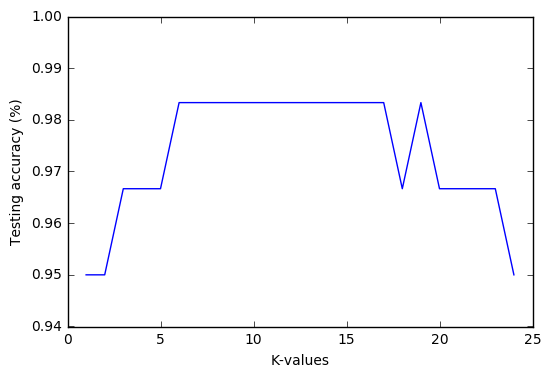

In [63]:
K = []
Test_accuracy = []
for k in range(1,25):
    K.append(k)
    y_pred = KNN(X_train,y_train,X_test,k)
    test_accuracy = metrics.accuracy_score(y_test,y_pred)
    Test_accuracy.append(test_accuracy)
    
plt.plot(K,Test_accuracy,'b-')
plt.xlabel('K-values')
plt.ylabel('Testing accuracy (%)')
plt.ylim()
plt.show()

In [119]:
Max = np.where(Test_accuracy==max(Test_accuracy))[0]
shape = len(Max)
if shape%2 == 0:
    j = int(shape/2.) - 1
else:
    j = int((shape-1)/2.) # Note on principle we should add 1 but python counts from 0
i = Max[j]
k_final = K[i]   # This the k-th value to use

#  Train the model on the entire data

In [124]:
knn = KNeighborsClassifier(n_neighbors=k_final)
knn.fit(X,y)
knn.predict([3,5,4,2])

/Users/themba/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])